<a href="https://colab.research.google.com/github/kostas-gp/ce888/blob/master/lab2/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np

In [16]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
print (df)

    Day   Millons of pounds in sales
0     1                          2.0
1     2                          8.0
2     3                         20.0
3     4                         13.0
4     5                          5.0
5     6                          9.0
6     7                         10.0
7     8                          8.0
8     9                         22.0
9    10                         10.0
10   11                          2.0
11   12                          4.0
12   13                          7.0
13   14                          9.0


In [31]:
#bootstrap function:
# 1. Create an array of samples of shape (n_iterations, sample_size)
num_samples = 1000
resamples_array = np.random.randint(len(data),size=(num_samples,len(data)))
print(resamples_array)


[[11  4  9 ...  2 11 10]
 [13  8  5 ...  8  5  5]
 [ 1  8  6 ...  4  1  3]
 ...
 [ 6 11  7 ...  4  6 13]
 [ 0  6  6 ...  6  7  9]
 [ 4  4  5 ...  4 13  7]]


In [13]:
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
x=resamples_array.mean()
print(x)

9.200285714285714


In [0]:
#Get the data mean to that iteration 
iteration_mean=[]
for x in resamples_array:
    iteration_mean.append(x.mean())

np_array = np.array(iteration_mean)  # transformed to a numpy array
#print(np_array)

In [63]:
#4. Calculate the lower and upper bounds for a 95% CI
ordered = sorted(np_array)
lower = np.percentile(ordered, (1-0.95)/2)
upper = np.percentile(ordered, 0.95+((1-0.95)/2))
print(lower)
print(upper)



3.071285714285714
3.910017857142857


In [0]:
n_iterations = 100
sample_size=len(data)
def boostrap_mean(data, sample_size, n_iterations):
  new_array = np.random.choice(sample_size,size=(n_iterations,sample_size),replace =True)
  data_mean=np.mean(new_array)
  list_of_means=[]
  for item in new_array:
    list_of_means.append(np.mean(item))
  list_of_means_array=np.array(list_of_means)
  ordered = sorted(list_of_means_array)
  alpha=0.95
  lower = np.percentile(ordered, ((1-alpha)/2) *100)
  upper = np.percentile(ordered, (alpha+((1-alpha)/2)) *100)
  return data_mean, lower, upper


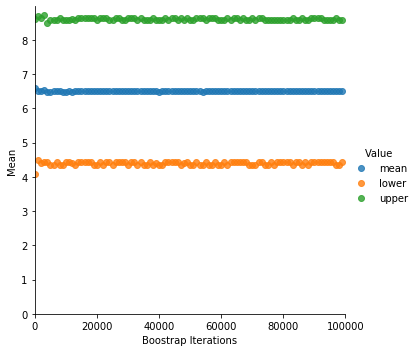

In [89]:

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')

In [0]:
n_iterations = 100
sample_size=len(data)
def boostrap_mean_ci(data, sample_size, n_iterations, ci):
  new_array = np.random.randint(sample_size,size=(n_iterations,sample_size))
  data_mean=np.mean(new_array)
  list_of_means=[]
  for item in new_array:
    list_of_means.append(np.mean(item))
  list_of_means_array=np.array(list_of_means)
  ordered = sorted(list_of_means_array)
  alpha=ci/100
  lower = np.percentile(ordered, ((1-alpha)/2) *100)
  upper = np.percentile(ordered,(alpha+((1-alpha)/2)) *100)
  return data_mean, lower, upper

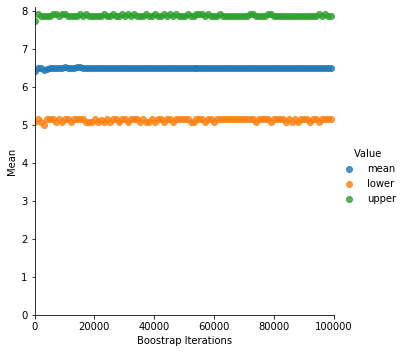

In [92]:
boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')